In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df = pd.read_csv('train.csv')

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [51]:
print(df.shape)
print(df.info())

(58592, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  objec

__Data Processing__

In [52]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [55]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
policy_id,58592,58592,ID00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_tenure,58592.0,NaN,NaN,NaN,0.611246,0.414156,0.002735,0.21025,0.573792,1.039104,1.396641
age_of_car,58592.0,NaN,NaN,NaN,0.069424,0.056721,0.0,0.02,0.06,0.11,1.0
age_of_policyholder,58592.0,NaN,NaN,NaN,0.46942,0.122886,0.288462,0.365385,0.451923,0.548077,1.0
area_cluster,58592,22,C8,13654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_density,58592.0,NaN,NaN,NaN,18826.858667,17660.174792,290.0,6112.0,8794.0,27003.0,73430.0
make,58592.0,NaN,NaN,NaN,1.763722,1.136988,1.0,1.0,1.0,3.0,5.0
segment,58592,6,B2,18314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,58592,11,M1,14948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,58592,3,Petrol,20532,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.nunique()


policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [57]:
df.max_power.unique()


array(['40.36bhp@6000rpm', '88.50bhp@6000rpm', '67.06bhp@5500rpm',
       '113.45bhp@4000rpm', '88.77bhp@4000rpm', '55.92bhp@5300rpm',
       '97.89bhp@3600rpm', '61.68bhp@6000rpm', '118.36bhp@5500rpm'],
      dtype=object)

In [58]:
df.groupby("segment")[["displacement","is_claim"]].describe().T


segment                        A           B1            B2           C1  \
displacement count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean     823.811270   998.000000   1223.176695  1376.094743   
             std       69.803312     0.000000     84.665109   147.572646   
             min      796.000000   998.000000   1197.000000  1197.000000   
             25%      796.000000   998.000000   1197.000000  1197.000000   
             50%      796.000000   998.000000   1197.000000  1498.000000   
             75%      796.000000   998.000000   1197.000000  1498.000000   
             max      999.000000   998.000000   1497.000000  1498.000000   
is_claim     count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean       0.060389     0.058471      0.068581     0.064099   
             std        0.238213     0.234660      0.252748     0.244964   
             min        0.000000     0.000000      0.000000     0.000000   
             25%        0.000000     0.000000      0.000000     0.000000   
             50%        0.000000     0.000000      0.000000     0.000000   
             75%        0.000000     0.000000      0.000000     0.000000   
             max        1.000000     1.000000      1.000000     1.000000   

segment                       C2      Utility  
displacement count  14018.000000  1209.000000  
             mean    1493.000000  1196.000000  
             std        0.000000     0.000000  
             min     1493.000000  1196.000000  
             25%     1493.000000  1196.000000  
             50%     1493.000000  1196.000000  
             75%     1493.000000  1196.000000  
             max     1493.000000  1196.000000  
is_claim     count  14018.000000  1209.000000  
             mean       0.064275     0.060380  
             std        0.245250     0.238289  
             min        0.000000     0.000000  
             25%        0.000000     0.000000  
             50%        0.000000     0.000000  
             75%        0.000000     0.000000  
             max        1.000000     1.000000

__EDA__

1. Distribution of Target Variable

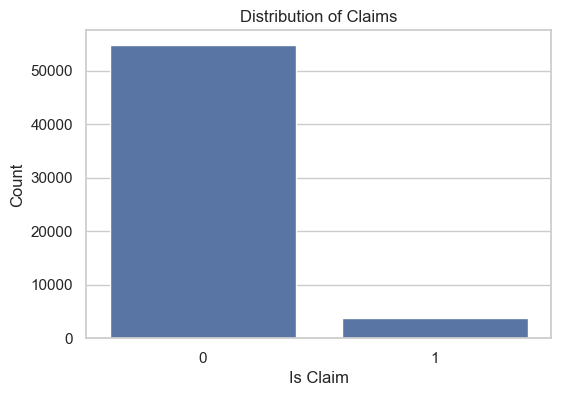

In [59]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Countplot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='is_claim', data=df)
plt.title('Distribution of Claims')
plt.xlabel('Is Claim')
plt.ylabel('Count')
plt.show()


2. Correlation Heatmap


The highest correlation with the target variable `is_claim`

In [60]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])


In [61]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()


# Get the correlation values for 'is_claim' and sort them
is_claim_corr = corr_matrix['is_claim'].sort_values(ascending=False)

is_claim_corr

is_claim               1.000000
policy_tenure          0.078747
age_of_policyholder    0.022435
cylinder               0.013434
width                  0.009947
displacement           0.007678
length                 0.006495
gross_weight           0.003894
ncap_rating            0.003800
airbags                0.002789
turning_radius         0.002724
make                  -0.000456
gear_box              -0.000635
height                -0.002024
population_density    -0.017808
age_of_car            -0.028172
Name: is_claim, dtype: float64

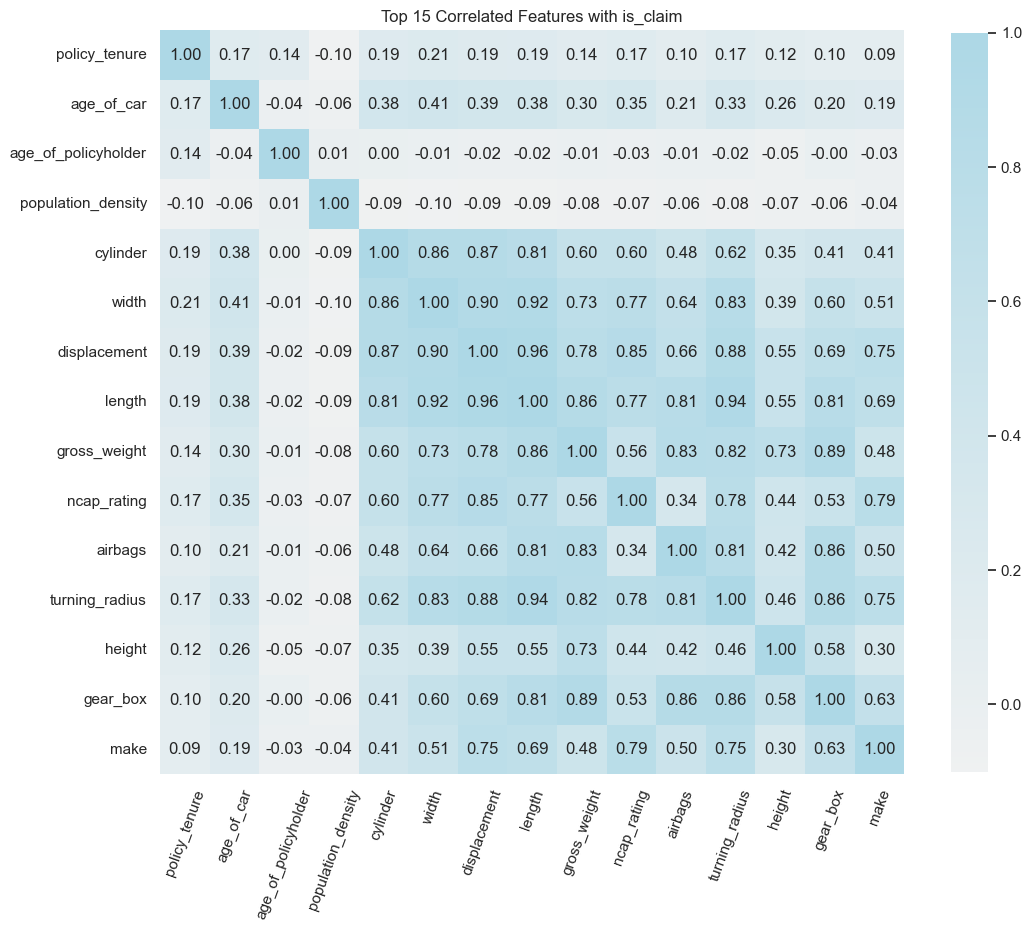

In [62]:

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Extract the correlations with 'is_claim'
is_claim_corr = corr_matrix['is_claim']

# Get the top correlated features (absolute values)
top_corr = is_claim_corr.abs().sort_values(ascending=False)

# Select the top N features (excluding 'is_claim' itself)
top_n = 15  
top_features = top_corr.index[1:top_n + 1]  # Exclude 'is_claim'

# Create a new correlation matrix for the top features
top_corr_matrix = corr_matrix.loc[top_features, top_features]

# Create a heatmap for the top correlated features

# Define a custom color palette
custom_palette = ["#FF0000", "#FFA500", "#FFFF00", "#008000", "#0000FF", "#800080"]  # Example colors (red, orange, yellow, green, blue, purple)

# Create a heatmap for the top correlated features
cmap = sns.light_palette("lightblue", as_cmap=True)  # Replace "blue" with your preferred color

# Create a heatmap for the top correlated features
plt.figure(figsize=(12, 12))
sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', square=True, cmap=cmap, cbar_kws={'shrink': .8})
plt.xticks(rotation = 70)
plt.title(f'Top {top_n} Correlated Features with is_claim')
plt.show()

3. Box Plots for Numerical Features


In [63]:
df_numeric.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

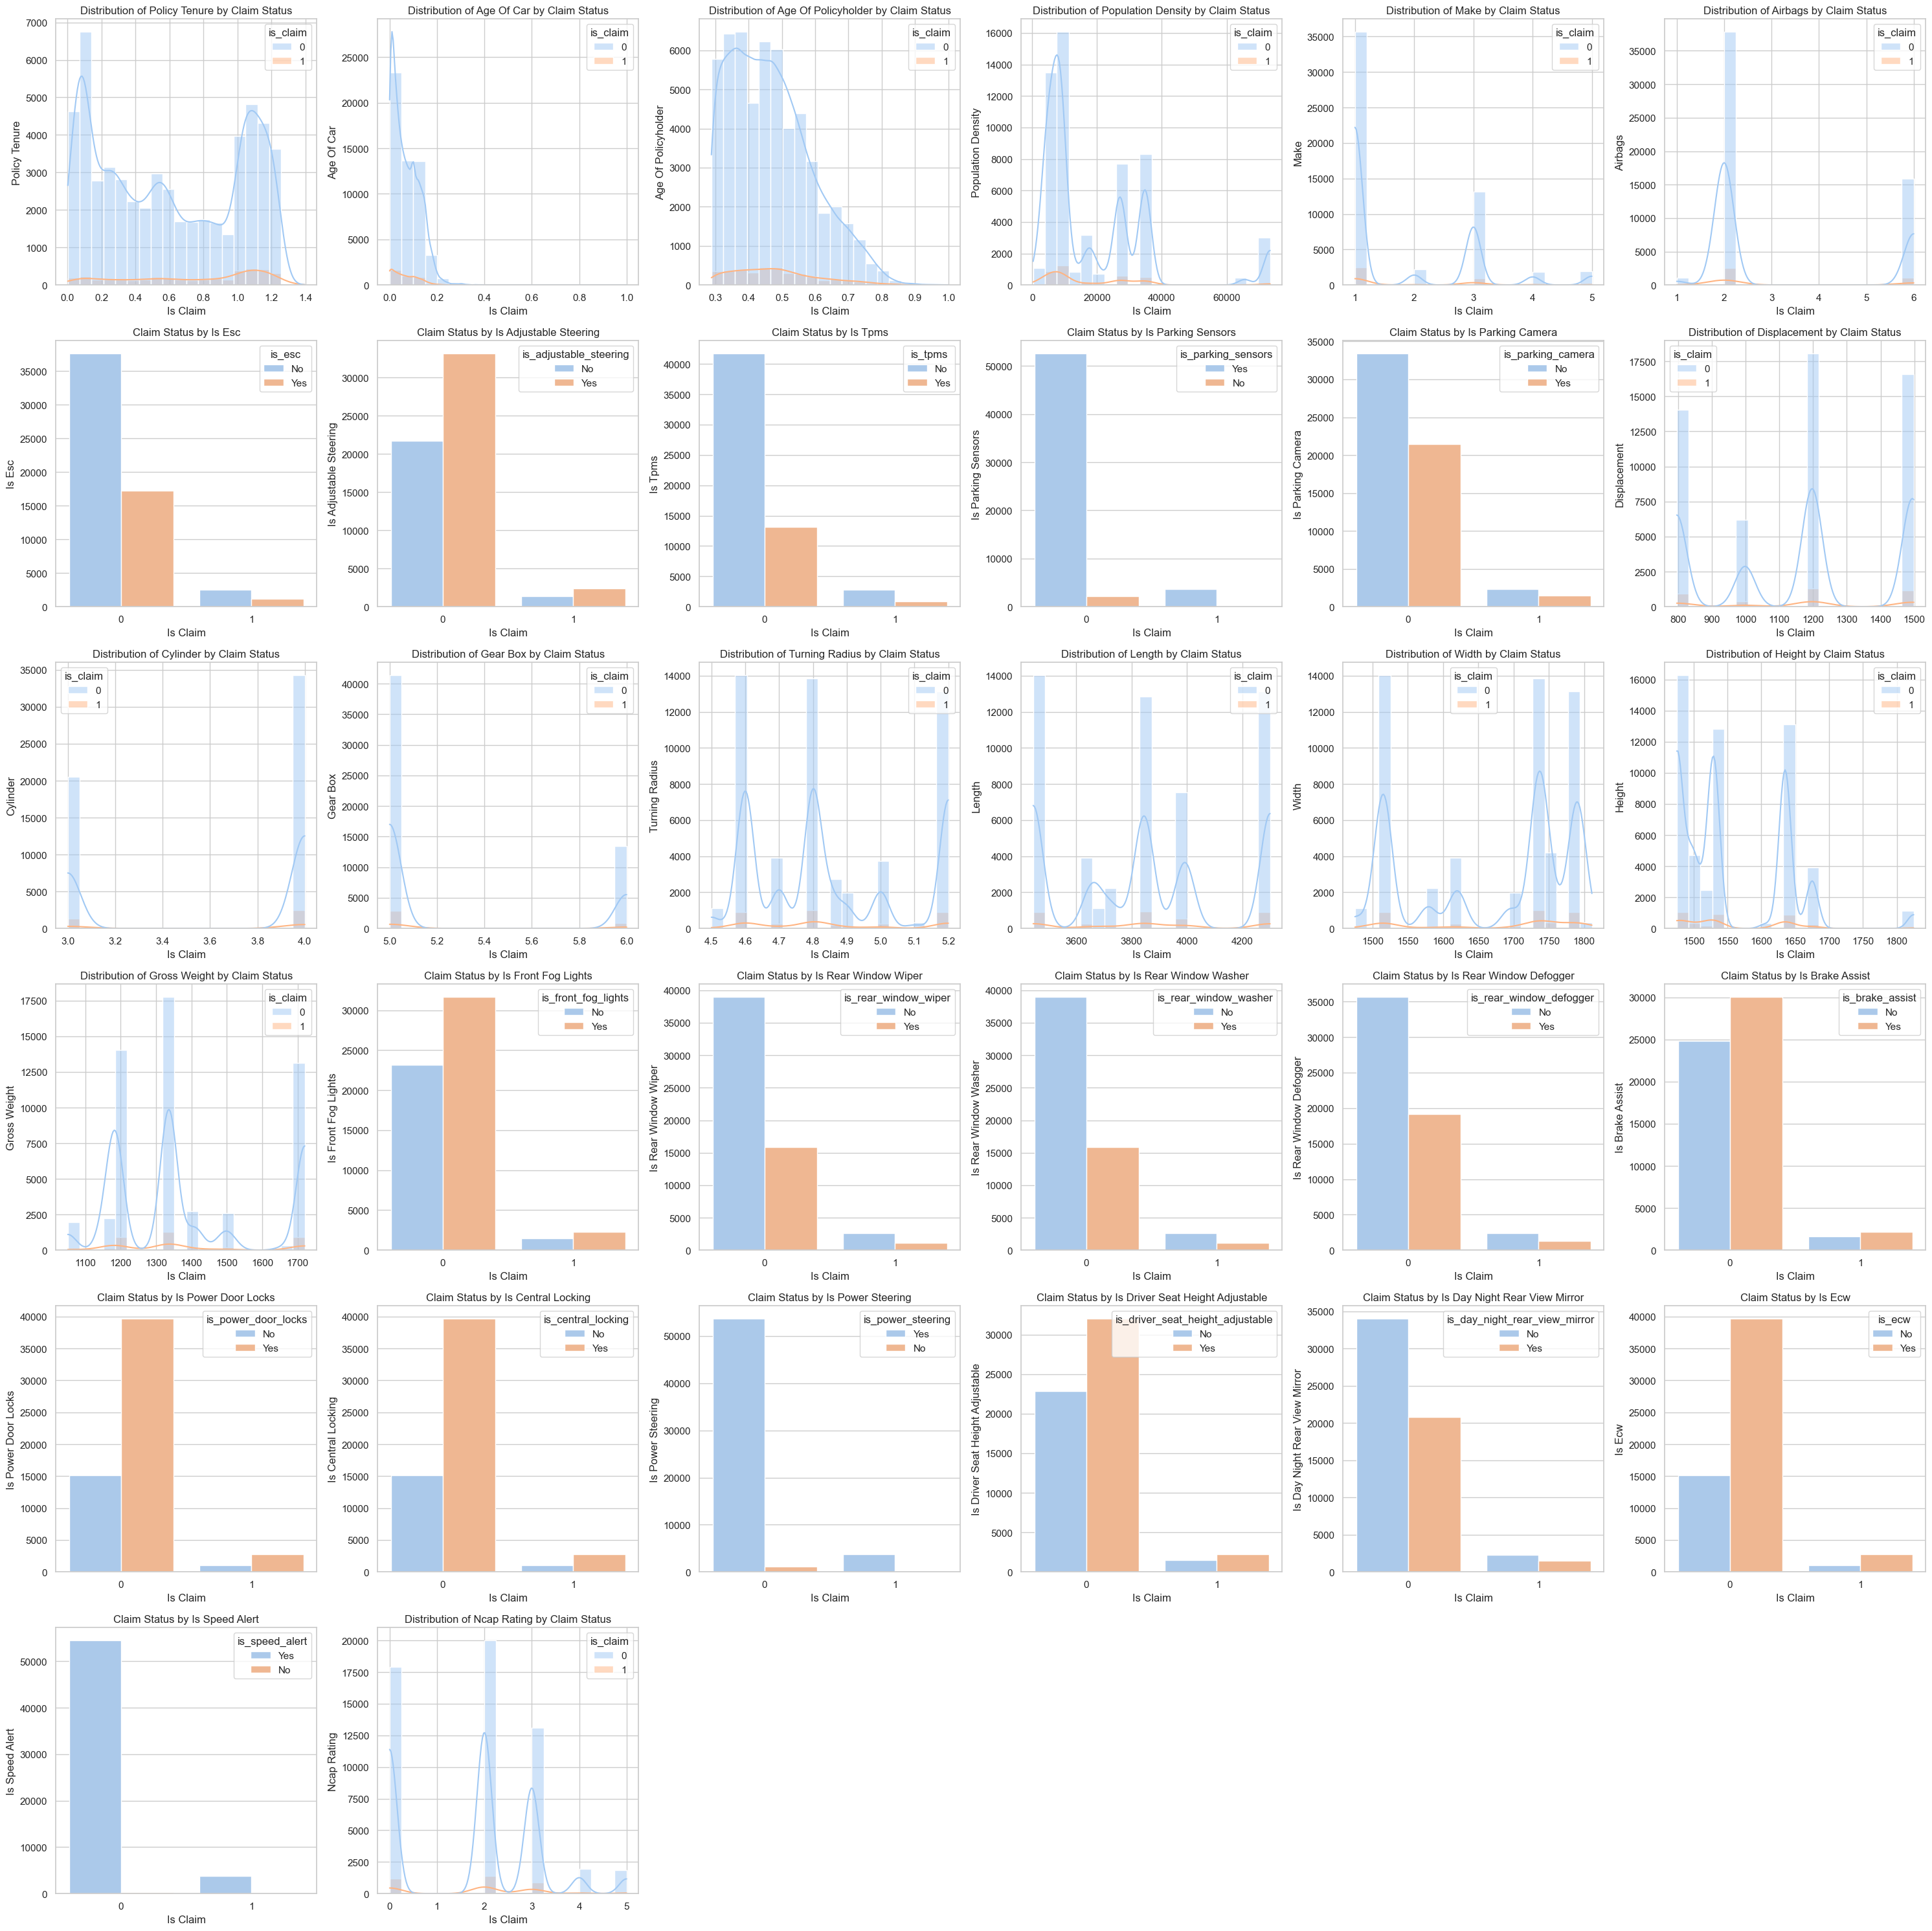

In [64]:
features_to_plot = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'
]

# Create a figure with subplots
n_cols = 6  # Set number of columns for the layout
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axs = axs.flatten()  # Flatten the array of axes for easier indexing

# Loop through each feature and create a plot in the respective subplot
for i, col in enumerate(features_to_plot):
    if df[col].dtype == 'object':  # Check if the column is categorical
        sns.countplot(x='is_claim', hue=col, data=df, ax=axs[i], palette='pastel')
        axs[i].set_title(f'Claim Status by {col.replace("_", " ").title()}')
    else:
        sns.histplot(data=df, x=col, hue='is_claim', kde=True, ax=axs[i], palette='pastel', bins=20)  # Change to histplot for histograms
        axs[i].set_title(f'Distribution of {col.replace("_", " ").title()} by Claim Status')

    axs[i].set_xlabel('Is Claim')
    axs[i].set_ylabel(col.replace("_", " ").title())

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

4. Count Plots for Categorical Features

In [65]:
df_cat = df.select_dtypes(include='object')


In [66]:
df_cat.columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [67]:
df_cat =  df[['area_cluster', 'segment', 'model', 'fuel_type',
                        'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
                        'transmission_type', 'steering_type','is_claim']]

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_4140/458174475.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_4140/458174475.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_4140/458174475.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_4140/458174475.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set

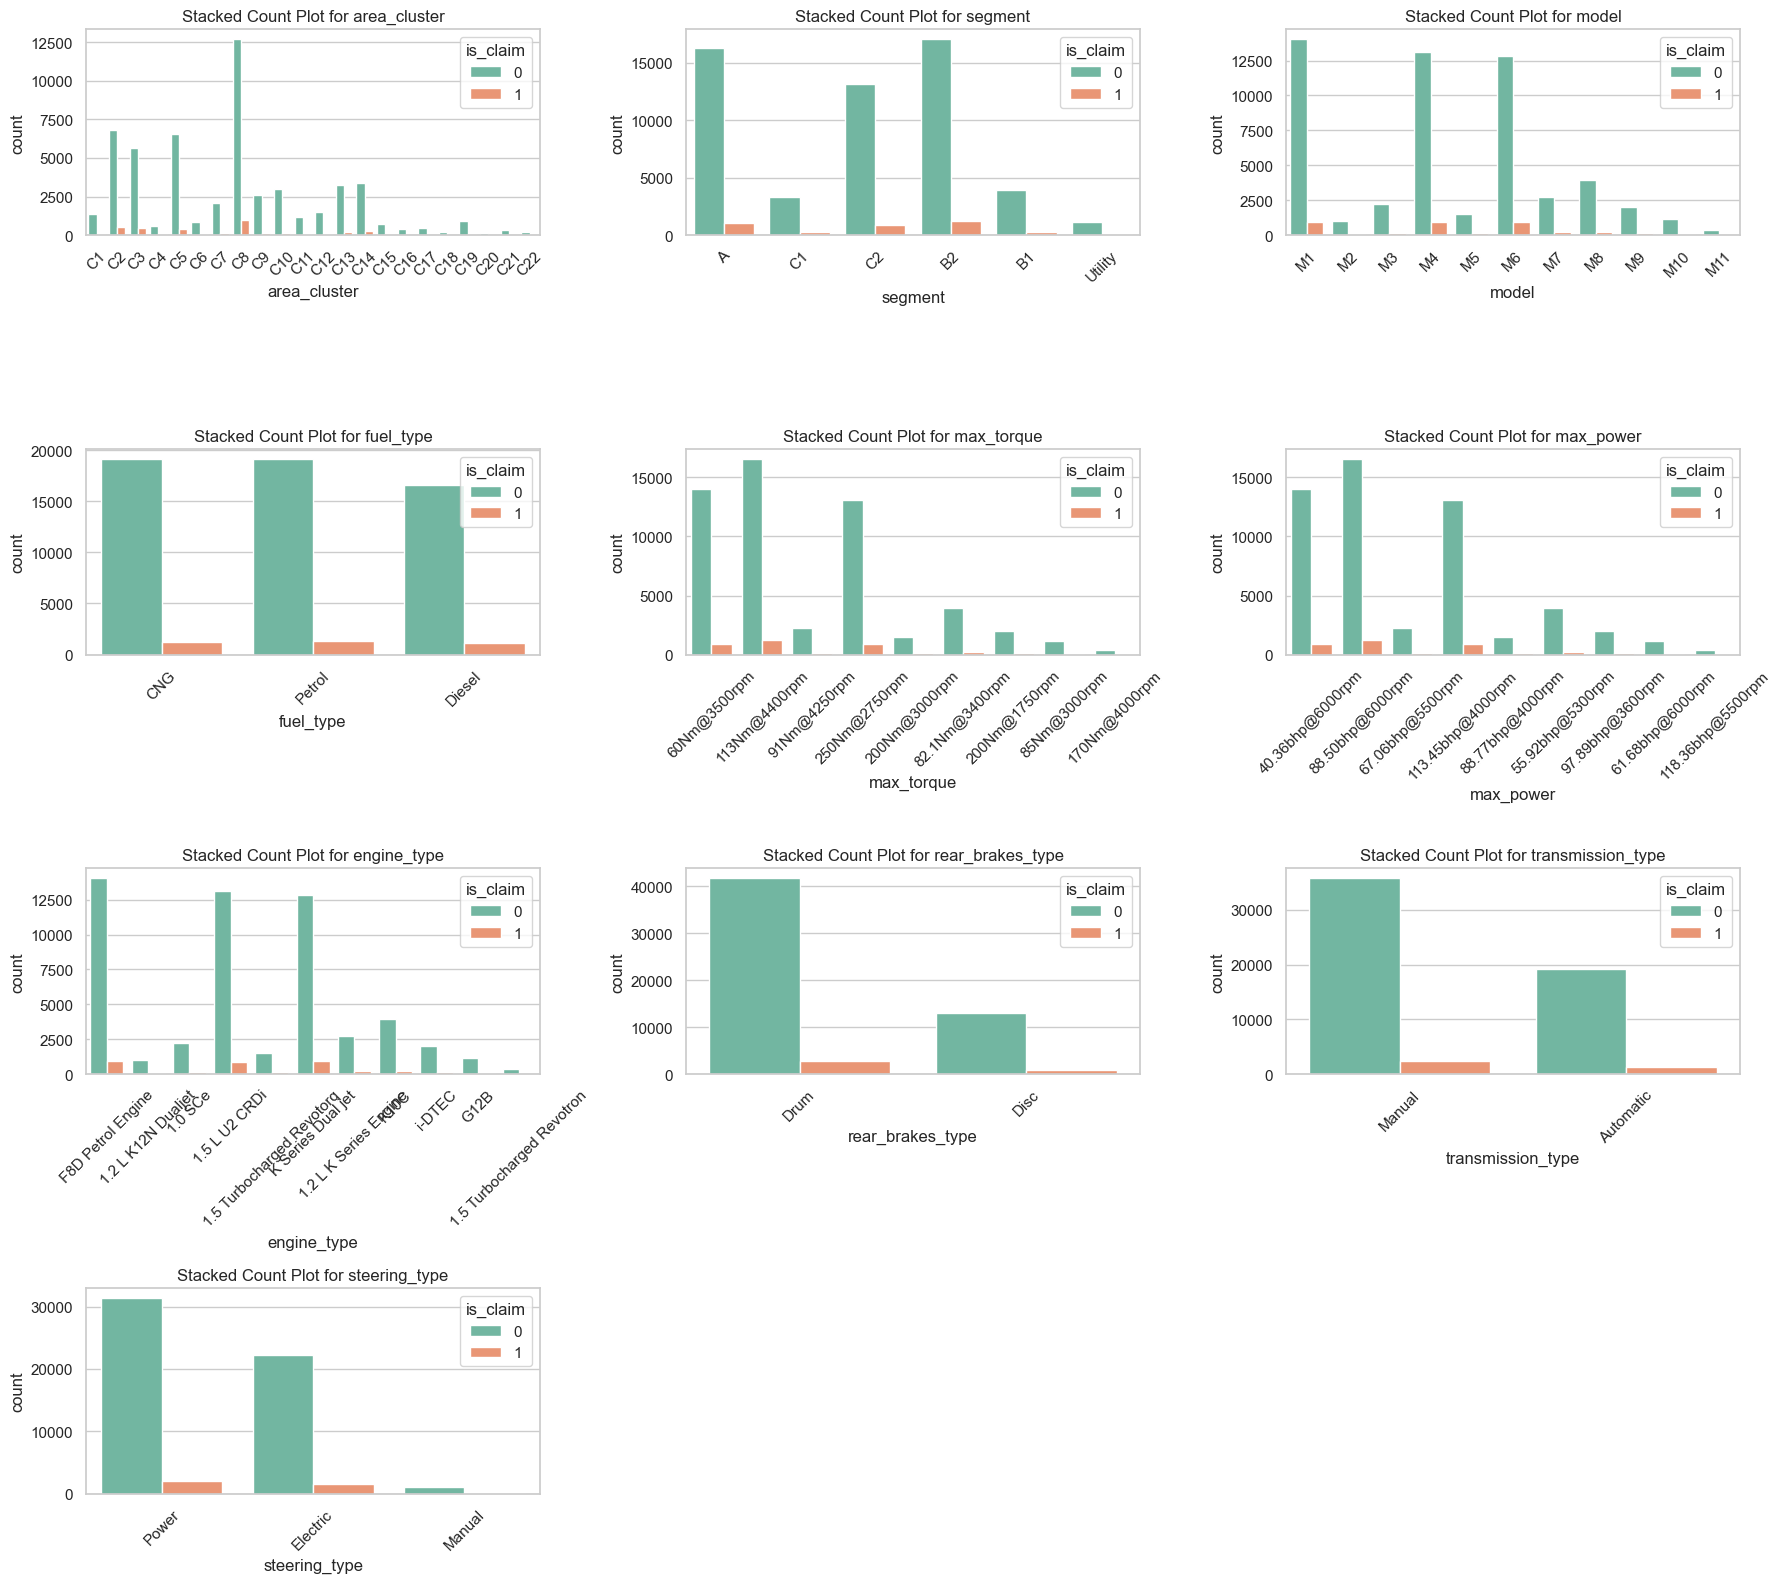

In [68]:
categorical_features = ['area_cluster', 'segment', 'model', 'fuel_type',
                        'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
                        'transmission_type', 'steering_type']

# Create a grid for the plots
num_features = len(categorical_features)
fig, axes = plt.subplots(nrows=(num_features // 3) + (num_features % 3 > 0), ncols=3, figsize=(18, 4 * ((num_features // 3) + 1)))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical feature and create a stacked count plot
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='is_claim', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Stacked Count Plot for {feature}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

5. Pair Plot


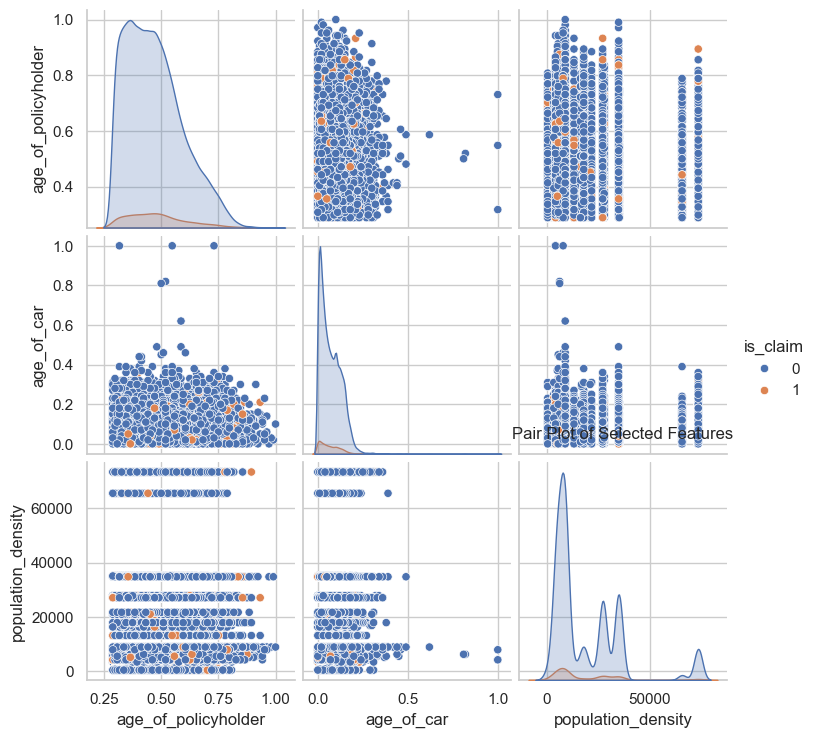

In [69]:
# pair plot for 'age_of_policyholder', 'age_of_car', 'population_density', 'is_claim'
subset = df[['age_of_policyholder', 'age_of_car', 'population_density', 'is_claim']]

# Create a pair plot
sns.pairplot(subset, hue='is_claim', diag_kind='kde')
plt.title('Pair Plot of Selected Features')
plt.show()

__Encoding Categorical Variables__


In [70]:
# List of columns with "Yes" and "No" values
binary_columns = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
    'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
    'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
    'is_ecw', 'is_speed_alert'
]

# Map "Yes" to 1 and "No" to 0 for the specified columns
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [71]:
categorical_cols

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'rear_brakes_type', 'transmission_type',
       'steering_type'],
      dtype='object')

In [72]:
df = df.drop(columns='policy_id')

In [73]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Check the resulting DataFrame
df_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 111 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    policy_tenure                          float64
 1    age_of_car                             float64
 2    age_of_policyholder                    float64
 3    population_density                     int64  
 4    make                                   int64  
 5    airbags                                int64  
 6    is_esc                                 int64  
 7    is_adjustable_steering                 int64  
 8    is_tpms                                int64  
 9    is_parking_sensors                     int64  
 10   is_parking_camera                      int64  
 11   displacement                           int64  
 12   cylinder                               int64  
 13   gear_box                               int64  
 14   turning_radius                      

In [74]:
df_encoded.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,segment_A,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,model_M1,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,max_torque_113Nm@4400rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,max_power_113.45bhp@4000rpm,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,engine_type_1.0 SCe,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
1,0.672619,0.02,0.375000,27003,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
2,0.841110,0.02,0.384615,4076,1,2,0,0,0,1,0,796,3,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True
3,0.900277,0.11,0.432692,21622,1,2,1,1,0,1,1,1197,4,5,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,F

In [75]:
X = df_encoded.drop('is_claim', axis=1)  #'is_claim' is the target variable
y = df_encoded['is_claim']

In [76]:
# Import SMOTE from imbalanced-learn
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to your data (X = features, y = target variable)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the target variable after SMOTE
print(y_resampled.value_counts())

is_claim
0    54844
1    54844
Name: count, dtype: int64


/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_4140/1847619524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resampled, x='is_claim', palette=['#1f77b4', '#ff7f0e'])


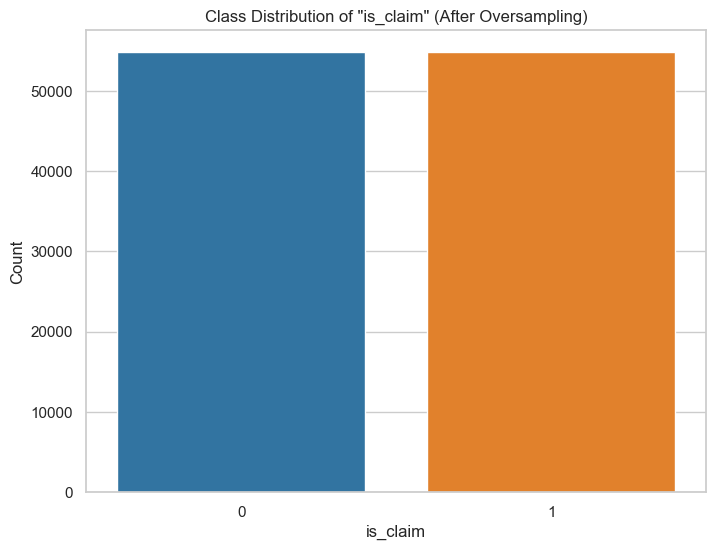

In [77]:
df_resampled = pd.DataFrame({'is_claim': y_resampled})

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_resampled, x='is_claim', palette=['#1f77b4', '#ff7f0e'])

# Add title and labels
plt.title('Class Distribution of "is_claim" (After Oversampling)')
plt.xlabel('is_claim')
plt.ylabel('Count')

# Show the plot
plt.show()

In [78]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Check for null valeus again
df_encoded.isnull().sum()

policy_tenure                            0
age_of_car                               0
age_of_policyholder                      0
population_density                       0
make                                     0
airbags                                  0
is_esc                                   0
is_adjustable_steering                   0
is_tpms                                  0
is_parking_sensors                       0
is_parking_camera                        0
displacement                             0
cylinder                                 0
gear_box                                 0
turning_radius                           0
length                                   0
width                                    0
height                                   0
gross_weight                             0
is_front_fog_lights                      0
is_rear_window_wiper                     0
is_rear_window_washer                    0
is_rear_window_defogger                  0
is_brake_as

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix



In [80]:
# Splitting the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [81]:
# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (87750, 110)
X_test shape: (21938, 110)
y_train shape: (87750,)
y_test shape: (21938,)


In [82]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

#Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9060534232837998
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     11092
           1       0.90      0.91      0.91     10846

    accuracy                           0.91     21938
   macro avg       0.91      0.91      0.91     21938
weighted avg       0.91      0.91      0.91     21938

Confusion Matrix:
[[9964 1128]
 [ 933 9913]]


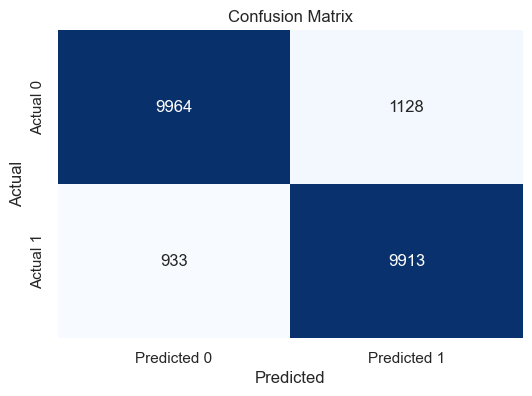

In [83]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap 
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'],
            cmap='Blues')  # Custom color palette

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

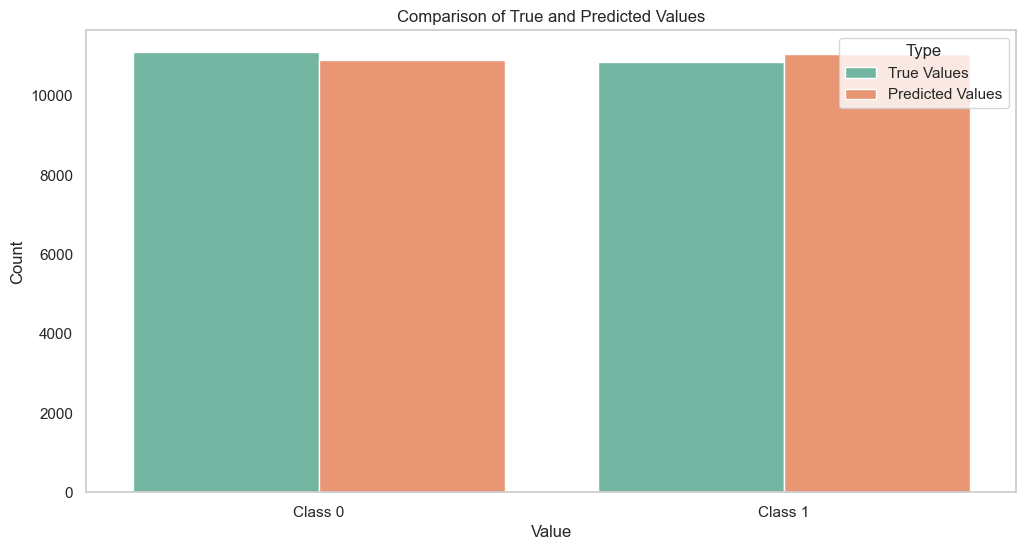

In [84]:
# Create a DataFrame with true and predicted values
results_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(var_name='Type', value_name='Value')

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=results_melted, x='Value', hue='Type', palette='Set2')

plt.title('Comparison of True and Predicted Values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xticks([0, 1], ['Class 0', 'Class 1'])  # Adjust labels if necessary
plt.grid(axis='y')
plt.show()

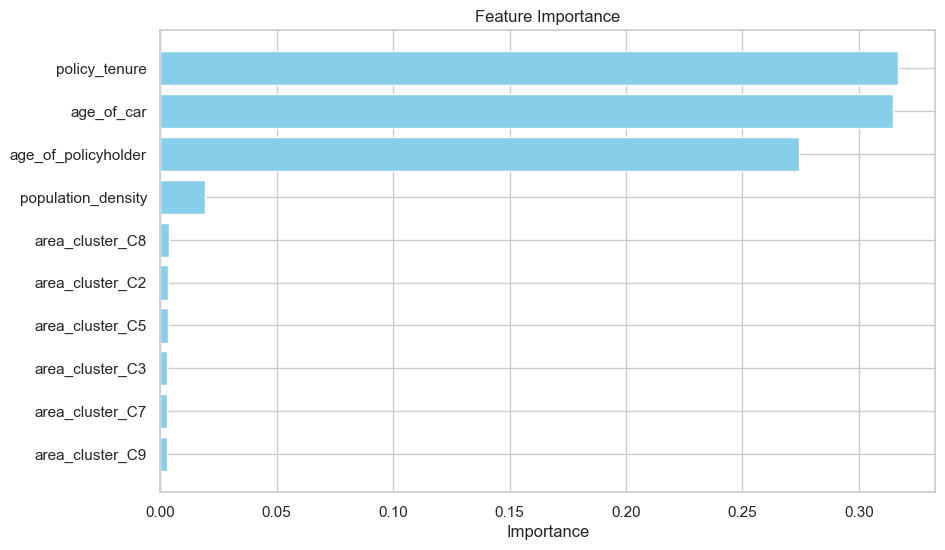

In [85]:

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()